In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("BitCoin.csv")

In [4]:
data.head()

,DATE,CBBTCUSD
0,2015-08-19,227.34
1,2015-08-20,235.56
2,2015-08-21,232.85
3,2015-08-22,231.15
4,2015-08-23,229.21


In [5]:
data.tail()

,DATE,CBBTCUSD
1823,2020-08-15,11854.27
1824,2020-08-16,11924.00
1825,2020-08-17,12325.10
1826,2020-08-18,11983.52
1827,2020-08-19,11764.80


In [6]:
data.isnull().sum()

DATE        0
CBBTCUSD    0
dtype: int64

In [7]:
data.drop('DATE',axis=1,inplace=True)

In [8]:
data

,CBBTCUSD
0,227.34
1,235.56
2,232.85
3,231.15
4,229.21
...,...
1823,11854.27
1824,11924.00
1825,12325.10
1826,11983.52


In [9]:
data.rename(columns={'CBBTCUSD':'Price'},inplace=True)

In [10]:
data.head()

,Price
0,227.34
1,235.56
2,232.85
3,231.15
4,229.21


In [11]:
#creating new column with price values shifted up 30 days
#so that we can see price 30 days later to each record

prediction_days=30

data['Prediction']=data[['Price']].shift(-prediction_days)

In [12]:
data.head()

,Price,Prediction
0,227.34,233.78
1,235.56,232.88
2,232.85,232.24
3,231.15,227.31
4,229.21,231.28


In [13]:
data.tail()

,Price,Prediction
1823,11854.27,NaN
1824,11924.00,NaN
1825,12325.10,NaN
1826,11983.52,NaN
1827,11764.80,NaN


In [14]:
#PREDICTOR VARIABLE

X=np.array(data.drop('Prediction',axis=1))

#remove last 30 records

X=X[:len(data)-prediction_days]

print(X)

[[ 227.34]
 [ 235.56]
 [ 232.85]
 ...
 [9174.6 ]
 [9221.71]
 [9161.13]]


In [15]:
#TARGET VARIABLE

y=np.array(data['Prediction'])

#removing last 30 records
y=y[:-prediction_days]

print(y)

[  233.78   232.88   232.24 ... 12325.1  11983.52 11764.8 ]


In [16]:
#selecting last 30 price records to predict their corresponding 30 days later prices

prediction_days_array=np.array(data.drop('Prediction',axis=1))[-prediction_days:]

In [17]:
print(prediction_days_array)

[[ 9396.65]
 [ 9546.31]
 [ 9612.05]
 [ 9553.41]
 [ 9709.02]
 [ 9944.58]
 [11108.44]
 [10952.85]
 [11100.39]
 [11139.67]
 [11372.76]
 [11805.82]
 [11050.03]
 [11235.44]
 [11198.04]
 [11737.59]
 [11766.62]
 [11598.96]
 [11780.14]
 [11692.76]
 [11896.19]
 [11387.01]
 [11563.16]
 [11824.99]
 [11785.29]
 [11854.27]
 [11924.  ]
 [12325.1 ]
 [11983.52]
 [11764.8 ]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [19]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
#intercept of our regression line

print(lm.intercept_)

635.6675589651131


In [21]:
#coefficients of our regression line

lm.coef_

array([0.9091386])

In [22]:
#predicting the prices of Bitcoin

predictions=lm.predict(X_test)
predictions

array([ 2889.41306616,   961.31191543,  3735.96656838,  1233.52619615,
        3233.38565687,  7486.65424351,  5510.25965014,  6608.7081853 ,
       10636.1921997 ,   842.35112913,  4863.1529748 ,  4463.79566035,
        9146.8504305 ,  1394.34372376,  1485.59396541,  4580.41996043,
        2996.68233001, 14361.96947709, 14341.74114315,  3708.56513087,
        8651.27897762,  1154.6402395 ,  1244.67223543, 10541.56905383,
        2199.77688693,  6903.27818428,  1124.66593974,  7275.74317883,
        8648.72429815, 10325.53953882,  1164.6680383 ,  1014.46924958,
       10763.47160422,  7916.08586297,  4340.71647618,   852.29710546,
         865.92509313,   876.58928895,   845.68766781,  9108.83934548,
        6408.24312318,  8624.74122178,  1941.64516319,  3725.12963623,
        1021.08777862,  8107.05951806,  6790.81773901,  2935.78822634,
        2077.00680989,   938.31070875,  9130.00409218,  6415.60714587,
       18500.25021313,  1156.62216166,  1446.16462417,  1043.33440025,
      

In [23]:
#actual price values

y_test

array([ 2516.66,   424.72,  4004.12,   591.48,  4626.05,  8892.39,
        7123.29,  6448.5 ,  6816.01,   233.78,  4392.71,  4814.99,
        9161.13,   894.31,  1251.98,  6124.16,  2258.99,  8787.52,
       10766.7 ,  4040.99,  6269.81,   607.08,   587.5 ,  6928.5 ,
        2799.73,  9356.25,   704.95,  8903.24,  9435.8 , 10304.64,
         608.6 ,   452.25,  8891.81,  7618.76,  3682.65,   329.46,
         338.07,   336.49,   253.27,  7315.09,  7727.27, 11469.9 ,
        2303.29,  4616.18,   454.37,  8795.44,  6303.7 ,  2700.21,
        2698.  ,   453.97,  8490.3 ,  3349.36, 13590.  ,   615.65,
         910.7 ,   442.48,  3944.93,   896.  ,  8259.99,  8059.  ,
         382.05,  3719.97,  3430.24,  6457.11,  9232.84,  7999.54,
        7938.64,  2754.28,  7514.32,  5605.46,   638.16,  9331.18,
        8730.  ,   384.89,  6619.01,   790.72,   680.  ,  8063.06,
        3874.  ,  1173.74,  6535.87,   706.42,  8304.04,  9944.58,
        9764.  ,  7256.98,   431.  ,  3809.88,  3806.17,  6266

In [24]:
#getting accuracy score 0f 81%

lm.score(X_test,y_test)

0.8190913550375456

In [25]:
dff=pd.DataFrame({'X_test':list(y_test),'predictions':list(predictions)})

In [26]:
dff.head()

,X_test,predictions
0,2516.66,2889.413066
1,424.72,961.311915
2,4004.12,3735.966568
3,591.48,1233.526196
4,4626.05,3233.385657


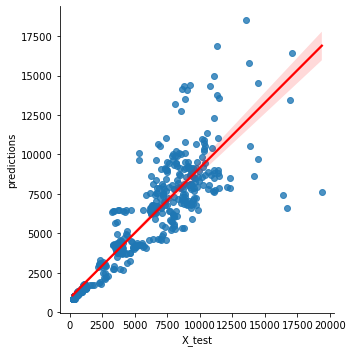

In [34]:
#plotting predicted vs actual values with regression line

sns.lmplot(data=dff,x='X_test',y='predictions',line_kws={"color": "red"})

In [31]:
#predicting the prices

predictions1=lm.predict(prediction_days_array)
predictions1

array([ 9178.52481946,  9314.58650289,  9374.35327469,  9321.04138697,
        9462.5124451 ,  9676.66913458, 10734.77918989, 10593.32631454,
       10727.46062413, 10763.17158848, 10975.08270562, 11368.79426934,
       10681.67640405, 10850.23979256, 10816.23800878, 11306.76374241,
       11333.15603608, 11180.72985778, 11345.44759   , 11266.00705881,
       11450.95312496, 10988.03793072, 11148.18269577, 11386.22245637,
       11350.12965381, 11412.84203469, 11476.23626953, 11840.89176347,
       11530.34819922, 11331.50140382])

In [32]:
data_final=pd.DataFrame({'Date':pd.date_range(start="2020-07-21",end="2020-08-19"),'Predicted Price':predictions1})

In [33]:
#creating dataframe for our predicted values

data_final

,Date,Predicted Price
0,2020-07-21,9178.524819
1,2020-07-22,9314.586503
2,2020-07-23,9374.353275
3,2020-07-24,9321.041387
4,2020-07-25,9462.512445
5,2020-07-26,9676.669135
6,2020-07-27,10734.779190
7,2020-07-28,10593.326315
8,2020-07-29,10727.460624
9,2020-07-30,10763.171588
